length of pro per topic 811
length of con per topic 5
length of pro per topic 3
length of con per topic 3
length of pro per topic 16
length of con per topic 20
length of pro per topic 24
length of con per topic 33
length of pro per topic 34
length of con per topic 53


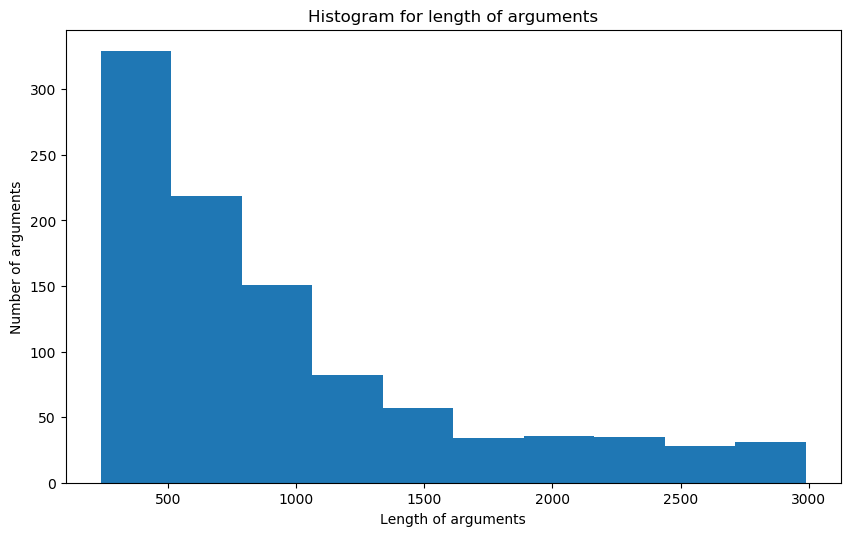

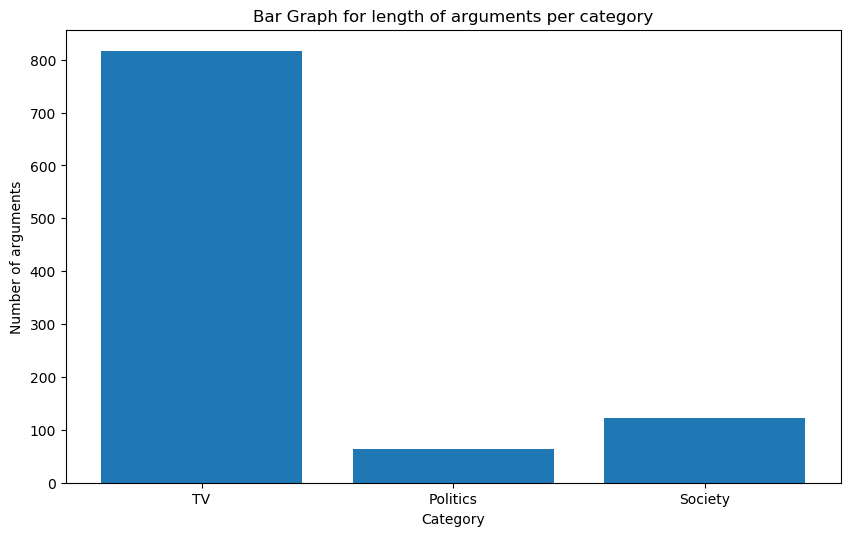

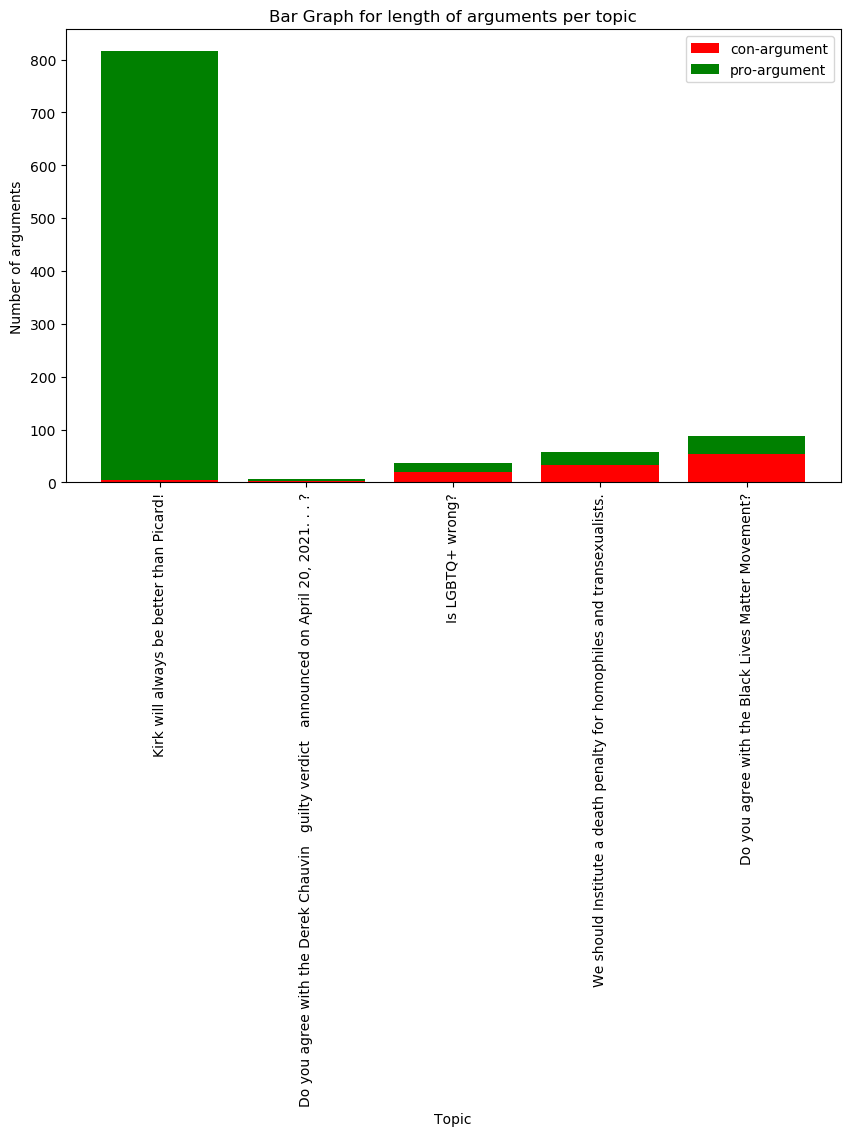

In [26]:
import json
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


# Function to plot histogram per argument length
# Here we plot the length of each argument
def plot_hist_per_arg_length(hist):
    fig = plt.figure(figsize=(10, 6), dpi=100)
    ax = plt.axes()
    plt.hist(hist_per_argument_length, density=False)
    plt.ylabel("Number of arguments")
    plt.xlabel("Length of arguments")
    plt.title("Histogram for length of arguments")
    fig.savefig('Hist_per_argument_length.png', bbox_inches="tight", dpi=150)

# Function to plot Bar Graph per category and  Stacked Bar Graph per topic
# Here we plot the number of arguments per category/topic
def plot_number_of_argument_graph(x, y, z, type_of_plot):
    fig = plt.figure(figsize=(10, 6), dpi=100)
    ax = plt.axes()
    color_legend = ['con-argument','pro-argument']
    plt.ylabel("Number of arguments")
    if type_of_plot == 'Per Category':
        plt.xlabel("Category")
        plt.title("Bar Graph for length of arguments per category")
        plt.bar(x,y)
        fig.savefig('Bar_Graph_Num_arg_per_category.png', bbox_inches="tight", dpi=150)
    elif type_of_plot == 'Per Topic':
        ax.set_xticklabels(x, rotation=90)
        plt.xlabel("Topic")
        plt.title("Bar Graph for length of arguments per topic")
        plt.bar(x, z, color='r')
        plt.bar(x, y, bottom = z, color = 'g')
        plt.legend(color_legend,loc = 0)
        fig.savefig('Bar_Graph_Num_arg_per_topic.png', bbox_inches="tight", dpi=150)


# Load contents of json file
f = open('data.json', 'r')
json_data = json.load(f)
# List for storing the length of each arguments to plot
# the histogram per argument length
hist_per_argument_length = []

# Store argument details per topic
hist_per_topic = {}
hist_plot_per_topic = []

# Store argument details per category
hist_per_category = {}
hist_plot_per_category = []

# Store pro and con arguments detail per topic for stacked bar graph
stack_bar_pro_topic = []
stack_bar_con_topic = []


for topic in range(0, len(json_data)):
    # Calculate the total number of pro and
    # con arguments per topic
    num_args = len(json_data[topic]['pro_arguments']) + \
        len(json_data[topic]['con_arguments'])
    
    stack_bar_pro_topic.append(len(json_data[topic]['pro_arguments']))
    print("length of pro per topic {}".format(len(json_data[topic]['pro_arguments'])))
    stack_bar_con_topic.append(len(json_data[topic]['con_arguments']))
    print("length of con per topic {}".format(len(json_data[topic]['con_arguments'])))
    
    # Store the length of each pro argument
    for pro_args in range(0, len(json_data[topic]['pro_arguments'])):
        hist_per_argument_length.append(
            len(json_data[topic]['pro_arguments'][pro_args]['body']))
        

    # Store the length of each con argument
    for con_args in range(0, len(json_data[topic]['con_arguments'])):
        hist_per_argument_length.append(
            len(json_data[topic]['con_arguments'][con_args]['body']))
        

    # Create a dictionary to store the number of arguments
    # per topic eg dict = {'topic 1': 10, 'topic 2' :20}
    hist_per_topic[json_data[topic]['topic']] = num_args
    # Create a dictionary to store the number of arguments
    # per category eg dict = {'Category 1': 10, 'Category 2' : 20
    if json_data[topic]['category'] in hist_per_category.keys():
        hist_per_category[json_data[topic]['category']] = hist_per_category.get(
            json_data[topic]['category']) + num_args
    else:
        hist_per_category[json_data[topic]['category']] = num_args
    hist_plot_per_topic.append(num_args)
    hist_plot_per_category = list(hist_per_category.values())


# Plot histogram per argument length
plot_hist_per_arg_length(hist_per_argument_length)
# Plot histogram for the number of arguements per category
plot_number_of_argument_graph(
    x = hist_per_category.keys(),y = hist_per_category.values(), z = 0, type_of_plot = 'Per Category')
# Plot histogram for the number of arguements per topic
plot_number_of_argument_graph(
    x = hist_per_topic.keys(),y = stack_bar_pro_topic, z = stack_bar_con_topic, type_of_plot = 'Per Topic')

TypeError: list indices must be integers or slices, not str